<a href="https://www.kaggle.com/code/manthanvarmas/wine-quality-red-white-ml?scriptVersionId=197408864" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
red_wine_df = pd.read_csv('/kaggle/input/wine-quality-red-white-analysis-dataset/wine-quality Red.csv')
white_wine_df = pd.read_csv('/kaggle/input/wine-quality-red-white-analysis-dataset/wine-quality White.csv')

In [3]:
red_wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
white_wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

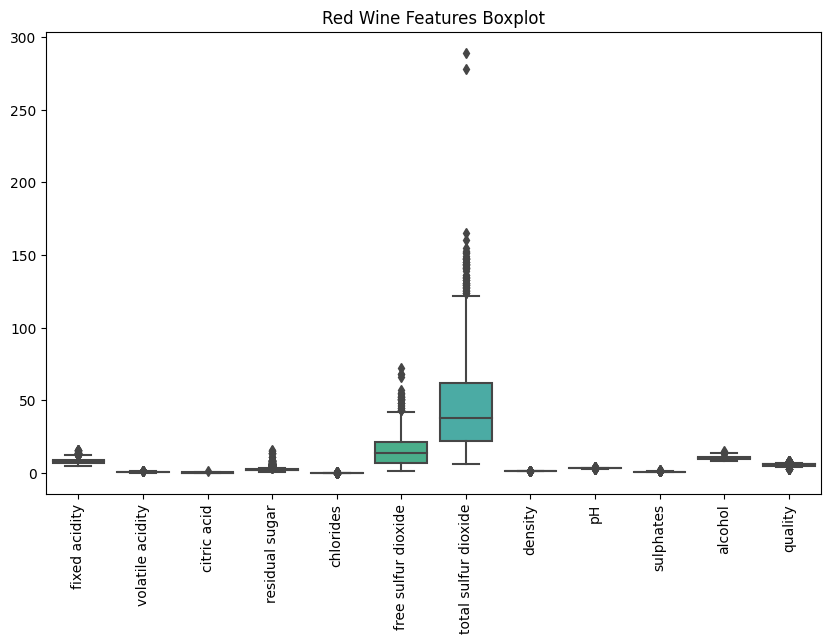

In [5]:
plt.figure(figsize=(10,6))
sns.boxplot(data=red_wine_df)
plt.title("Red Wine Features Boxplot")
plt.xticks(rotation=90)
plt.show()

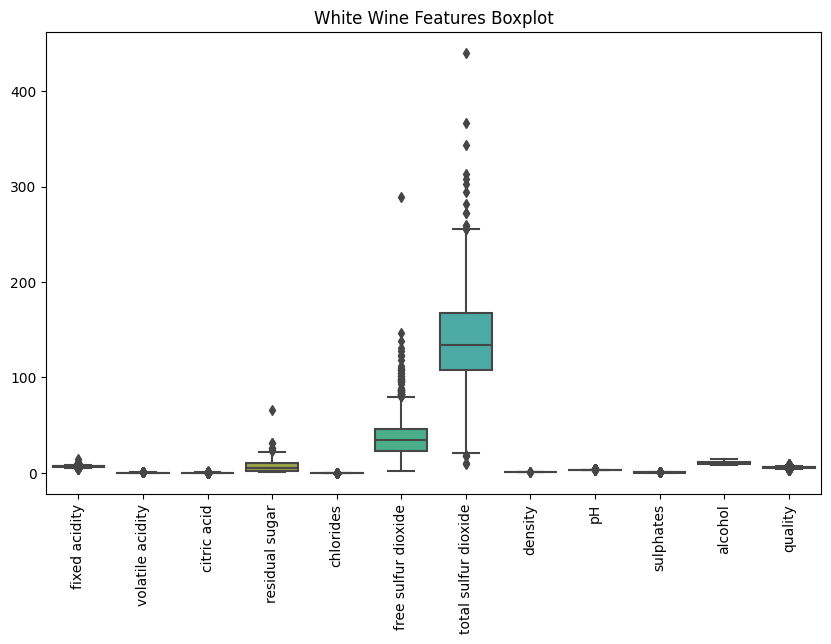

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(data=white_wine_df)
plt.title("White Wine Features Boxplot")
plt.xticks(rotation=90)
plt.show()

In [7]:
X_red = red_wine_df.drop(columns=['quality'])
y_red = red_wine_df['quality']

X_white = white_wine_df.drop(columns=['quality'])
y_white = white_wine_df['quality']

In [8]:
scaler = StandardScaler()

In [9]:
X_red_scaled = scaler.fit_transform(X_red)
X_white_scaled = scaler.fit_transform(X_white)

In [10]:
X_red_scaled = pd.DataFrame(X_red_scaled, columns=X_red.columns)
X_white_scaled = pd.DataFrame(X_white_scaled, columns=X_white.columns)

In [11]:
X_red_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [12]:
X_white_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572


In [13]:
label_encoder = LabelEncoder()

In [14]:
y_red_encoded = label_encoder.fit_transform(y_red)
y_white_encoded = label_encoder.fit_transform(y_white)

In [15]:
print(y_red_encoded[:5])
print(y_white_encoded[:5])

[2 2 2 3 2]
[3 3 3 3 3]


In [16]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red_scaled, y_red_encoded, test_size=0.3, random_state=42)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white_scaled, y_white_encoded, test_size=0.3, random_state=42)

In [17]:
print("Red Wine Training Set Shape:", X_train_red.shape)
print("Red Wine Test Set Shape:", X_test_red.shape)

Red Wine Training Set Shape: (1119, 11)
Red Wine Test Set Shape: (480, 11)


In [18]:
print("White Wine Training Set Shape:", X_train_white.shape)
print("White Wine Test Set Shape:", X_test_white.shape)

White Wine Training Set Shape: (3428, 11)
White Wine Test Set Shape: (1470, 11)


In [19]:
# random forest classifier

model_red = RandomForestClassifier(random_state=42)
model_white = RandomForestClassifier(random_state=42)

In [20]:
model_red.fit(X_train_red, y_train_red)
model_white.fit(X_train_white, y_train_white)

RandomForestClassifier(random_state=42)

In [21]:
y_pred_red = model_red.predict(X_test_red)
y_pred_white = model_white.predict(X_test_white)

In [22]:
print("Red Wine Classification Report:")
print(classification_report(y_test_red, y_pred_red))

Red Wine Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        17
           2       0.72      0.76      0.74       195
           3       0.62      0.69      0.66       200
           4       0.57      0.48      0.52        61
           5       0.50      0.17      0.25         6

    accuracy                           0.66       480
   macro avg       0.40      0.35      0.36       480
weighted avg       0.63      0.66      0.64       480



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
print("Red Wine Accuracy: ", accuracy_score(y_test_red, y_pred_red))

Red Wine Accuracy:  0.6583333333333333


In [24]:
print("White Wine Classification Report:")
print(classification_report(y_test_white, y_pred_white))

White Wine Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.44      0.10      0.16        40
           2       0.68      0.71      0.69       426
           3       0.66      0.78      0.71       668
           4       0.77      0.54      0.64       280
           5       0.78      0.37      0.50        49

    accuracy                           0.68      1470
   macro avg       0.55      0.42      0.45      1470
weighted avg       0.68      0.68      0.67      1470



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
print("White Wine Accuracy: ", accuracy_score(y_test_white, y_pred_white))

White Wine Accuracy:  0.6782312925170068


In [26]:
feature_importance_red = model_red.feature_importances_

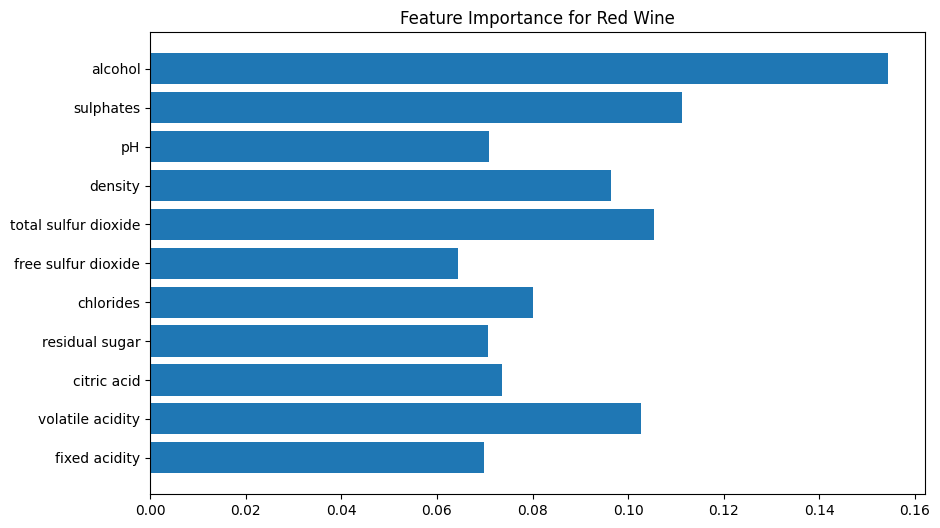

In [27]:
plt.figure(figsize=(10,6))
plt.barh(np.arange(len(feature_importance_red)), feature_importance_red, tick_label=X_train_red.columns)
plt.title("Feature Importance for Red Wine")
plt.show()

In [28]:
feature_importance_white = model_white.feature_importances_

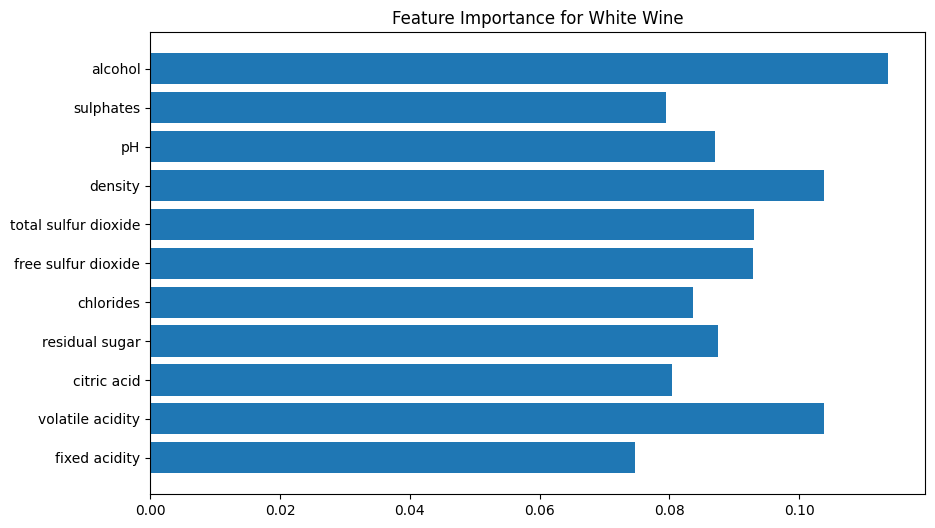

In [29]:
plt.figure(figsize=(10,6))
plt.barh(np.arange(len(feature_importance_white)), feature_importance_white, tick_label=X_train_white.columns)
plt.title("Feature Importance for White Wine")
plt.show()

In [30]:
# logistic regression

log_reg_red = LogisticRegression(max_iter=1000, random_state=42)
log_reg_white = LogisticRegression(max_iter=1000, random_state=42)

In [31]:
log_reg_red.fit(X_train_red, y_train_red)
log_reg_white.fit(X_train_white, y_train_white)

LogisticRegression(max_iter=1000, random_state=42)

In [32]:
y_pred_red_log = log_reg_red.predict(X_test_red)
y_pred_white_log = log_reg_white.predict(X_test_white)

In [33]:
print("Logistic Regression (Red Wine) Accuracy: ", accuracy_score(y_test_red, y_pred_red_log))
print("Logistic Regression (White Wine) Accuracy: ", accuracy_score(y_test_white, y_pred_white_log))

Logistic Regression (Red Wine) Accuracy:  0.5645833333333333
Logistic Regression (White Wine) Accuracy:  0.5401360544217687
